In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Fetch HSI data using yfinance 
start_date = '2004-03-13'
end_date = '2024-03-14'
symbols = ['^HSI']
HSI_data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
#in order to show all the columns in one row
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Reset index to move the Date from index to a column
HSI_data.reset_index(inplace=True)

# Check the modified dataframe
print(HSI_data.tail())

#check if any nan value to make sure the smoothness of aplying LTSM to predict the indice price
print(np.isnan(HSI_data).any())


           Date          Open          High           Low         Close     Adj Close      Volume
4925 2024-03-07  16417.769531  16512.410156  16136.120117  16229.780273  16229.780273  2535414300
4926 2024-03-08  16275.389648  16489.730469  16275.389648  16353.389648  16353.389648  2596313300
4927 2024-03-11  16416.169922  16625.640625  16416.169922  16587.570312  16587.570312  2494031000
4928 2024-03-12  16701.949219  17154.869141  16613.449219  17093.500000  17093.500000  4001753000
4929 2024-03-13  17059.109375  17214.669922  17050.869141  17082.109375  17082.109375  2801014000
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [4]:
HSI_data['Date'] = pd.to_datetime(HSI_data.Date)

In [5]:
HSI_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
HSI_data.drop('Adj Close', axis = 1, inplace = True)

In [7]:
HSI_data.head()

,Date,Open,High,Low,Close,Volume
0,2004-03-15,13002.320312,13075.959961,12912.549805,12919.410156,274434000
1,2004-03-16,12820.370117,12947.500000,12791.410156,12932.620117,203173400
2,2004-03-17,12948.490234,13033.750000,12889.370117,12975.719727,249012200
3,2004-03-18,12998.690430,13017.059570,12787.320312,12816.190430,259691600
4,2004-03-19,12792.669922,12851.120117,12715.969727,12790.580078,349134000


<AxesSubplot:>

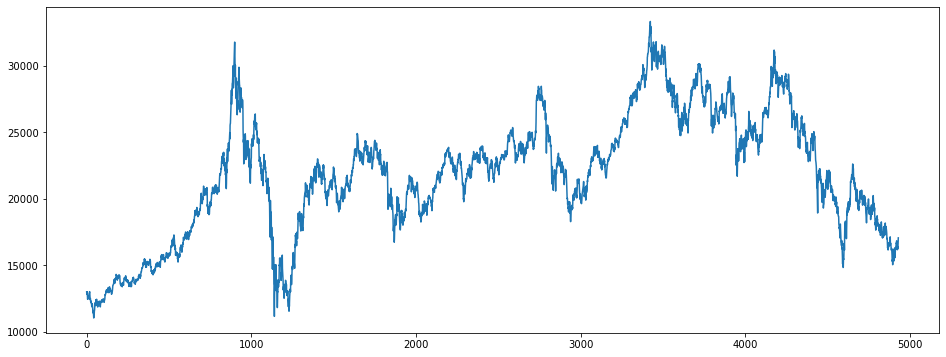

In [8]:
HSI_data['Open'].plot(figsize=(16,6))

In [9]:
X = HSI_data[['Open', 'High', 'Low', 'Close']]
y = HSI_data['Volume']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [11]:
X_train.shape

(3697, 4)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.coef_)

[ -391768.4456663   3092148.19802088 -2570235.42500687   -89846.01791701]


In [15]:
print(regressor.intercept_)

28894580.417919636


In [16]:
predicted = regressor.predict(X_test)

In [17]:
print(X_test)

              Open          High           Low         Close
4152  28408.119141  28510.919922  28280.089844  28496.859375
2946  19506.939453  19519.849609  19328.259766  19414.779297
4729  19479.060547  19806.439453  19410.070312  19678.169922
1718  22983.369141  23055.470703  22837.089844  22906.900391
780   20729.519531  20821.859375  20683.300781  20746.269531
...            ...           ...           ...           ...
4217  28716.980469  28848.019531  28597.000000  28755.339844
3172  22926.300781  23068.080078  22861.289062  22898.519531
1834  20056.779297  20264.330078  19924.560547  20260.099609
1907  18225.099609  18372.449219  18053.919922  18256.199219
748   19380.980469  19537.089844  19270.720703  19516.410156

[1233 rows x 4 columns]


In [18]:
predicted.shape

(1233,)

In [19]:
dframe=pd.DataFrame(y_test, predicted)

In [20]:
dfr = pd.DataFrame({'Actual Volume': y_test, 'Predicted Volume': predicted})

In [21]:
# Set the display format for floats to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Now print the DataFrame
print(dfr)

      Actual Volume  Predicted Volume
4152     3205592600     1812661483.97
2946     1225027600     1322440464.52
4729     1677939600     1985603844.68
1718     1287207300     1560876861.82
780      1187355000     1267075802.04
...             ...               ...
4217     1934891300     1896264160.24
3172     1068403800     1560779798.01
1834     1827188800     1800492447.61
1907     1726122400     1656140033.78
748       977841600     1563854388.45

[1233 rows x 2 columns]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
regressor.score(X_test, y_test)

0.4906120977718309

In [24]:
import math

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 482990905.60229015


In [26]:
print('Mean Sqaured Error:', metrics.mean_squared_error(y_test,predicted))

Mean Sqaured Error: 4.059162917728102e+17


In [27]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 637115603.1465641


In [28]:
graph=dfr.tail(20)

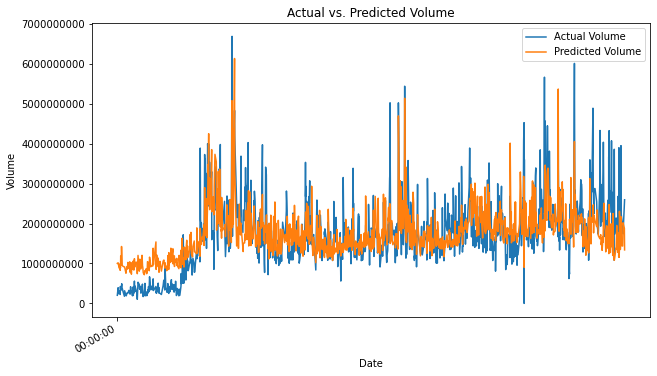

In [29]:
# Function to format y-axis ticks as real numbers
from matplotlib.ticker import FuncFormatter
def format_ticks_real(x, pos):
    return '{:.0f}'.format(x)

# Convert the index to datetime if it's not already
dfr.index = pd.to_datetime(dfr.index)

# Plotting the actual and predicted volumes
ax = dfr.plot(figsize=(10, 6))

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Actual vs. Predicted Volume')

# Formatting y-axis ticks as real numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks_real))

# Displaying the plot
plt.show()

In [30]:
# Assuming 'X_test' contains the features of the last day in your dataset
# Replace this with the last day's data if it's not included in 'X_test'
last_day_features = X_test.tail(1)

# Predicting the next day's trading volume
next_day_predicted_volume = regressor.predict(last_day_features)

# Converting the predicted volume to a readable format
formatted_predicted_volume = np.format_float_positional(next_day_predicted_volume, trim='-')

# Printing the predicted volume for the next day
print("Predicted volume for the next day:", formatted_predicted_volume)

Predicted volume for the next day: 1563854388.4510999


In [31]:
#Fetch HSI data using yfinance 
start_date = '2024-03-14'
end_date = '2024-03-15'
symbols = ['^HSI']
HSI_data1 = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [32]:
HSI_data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-14,17120.54,17209.82,16878.11,16961.66,16961.66,2699096400


#### error is 1563854388.4510999-2699096400=-1135242012, which is -42%